In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("used_car_data.csv")

In [52]:
# Tugas 1 : Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek
df.groupby("Name")["Year"].count()

Name
Ambassador Classic Nova Diesel    1
Audi A3 35 TDI Attraction         1
Audi A3 35 TDI Premium            1
Audi A3 35 TDI Premium Plus       1
Audi A3 35 TDI Technology         1
                                 ..
Volvo XC60 D4 Summum              1
Volvo XC60 D5                     3
Volvo XC60 D5 Inscription         1
Volvo XC90 2007-2015 D5 AT AWD    1
Volvo XC90 2007-2015 D5 AWD       1
Name: Year, Length: 1876, dtype: int64

In [53]:
# Tugas 2 : Kota apa yang memiliki mobil bekas paling banyak?
df1 = df.groupby("Location")["Name"].count()
df1.idxmax()

'Mumbai'

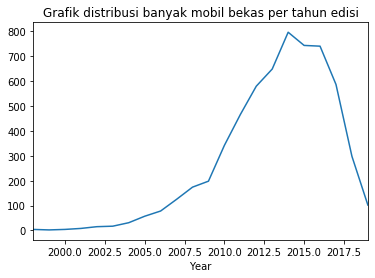

In [69]:
# Tugas 3 : Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?

# Distribusi mobil bekas dari tahun ke tahun
df2=df.groupby("Year")["Name"].count()
df2.plot(kind="line",x="Year",y="Jumlah mobil bekas", title="Grafik distribusi banyak mobil bekas tiap tahun edisi")

In [90]:
# Tugas 4 : Berapa banyak mobil yang memiliki total jarak pemakaian dibawah 100.000 km?

df.loc[df["Kilometers_Driven"]<100000]["Name"].count()

5470

In [ ]:
# Tugas 5 : Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi?
# Sertakan argumen mendukung!

In [ ]:
#Tugas 6

In [ ]:
#Tugas 7

In [93]:
# Tugas 8 : Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?

df.loc[(df["Owner_Type"]=="Third") | (df["Owner_Type"] == "Fourth & Above")]["Name"].count()

122

In [128]:
# Tugas 9 : Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?

# Fungsi untuk menghapus string yang tidak diinginkan (pada kasus ini satuan kmpl dan km/kg)
def clean(x):
    if isinstance(x,str):
        return(x.replace('kmpl','').replace('km/kg',''))
    return(x)
#Aplikasi fungsi pada column dataframe "Mileage" dan mengubah tipe data ke float
df['Mileage']=df['Mileage'].apply(clean).astype('float')

#Menghapus data kotor
df_bersih = df.loc[df["Mileage"]!=0.00].dropna()

# Melihat rata-rata konsumsi bahan bakar tiap tipe bahan bakar
df_fueltype = df_bersih.groupby("Fuel_Type")["Mileage"].mean()

# Mendapat tipe kendaraan dengan rata-rata minimum konsumsi bahan bakar
df_fueltype.idxmin()

'Petrol'

In [143]:
# Alternatif 2 Nomor 9 : Jika Melihat secara keseluruhan langsung tipe bahan bakar apa yang mengonsumsi minimum bahan bakar
df_sorted=df_bersih.sort_values(["Mileage"],ascending=[1])
df_sorted["Fuel_Type"][0:1]

5781    Petrol
Name: Fuel_Type, dtype: object